In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('AusApparalSales4thQrt2020.csv') # reading data from file and displaying dataframe
df

,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,8,20000
1,1-Oct-2020,Morning,WA,Men,8,20000
2,1-Oct-2020,Morning,WA,Women,4,10000
3,1-Oct-2020,Morning,WA,Seniors,15,37500
4,1-Oct-2020,Afternoon,WA,Kids,3,7500
...,...,...,...,...,...,...
7555,30-Dec-2020,Afternoon,TAS,Seniors,14,35000
7556,30-Dec-2020,Evening,TAS,Kids,15,37500
7557,30-Dec-2020,Evening,TAS,Men,15,37500
7558,30-Dec-2020,Evening,TAS,Women,11,27500


## 1. DATA Wrangling

* **Ensure that the data is clean and that there is no missing or incorrect data.**    * 	Inspect the data manually for missing/incorrect data using the functions isna(), and notna().


In [3]:
df.isna() # isna function is checking if there is any nan value in any cell

,Date,Time,State,Group,Unit,Sales
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
7555,False,False,False,False,False,False
7556,False,False,False,False,False,False
7557,False,False,False,False,False,False
7558,False,False,False,False,False,False


In [4]:
df.isna().values.any() # checking if any nan value is present

False

In [5]:
df.isna().sum() # checking if any nan value is present

Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64

In [7]:
df.isna().values.any() # checking if value is present in 

False

*Ans : In our Dataframe there is no missing value*

* **Based on your knowledge of Data Analytics, include your recommendations for treating missing data and incorrect data. (dropping the null values or filling them).**

*Ans : In our Dataframe there is no missing value so there is no question of treating missing and incorrect data.*

* **Select an appropriate Data Wrangling approach —  data standardization or data normalization. Perform the standardization or normalization and present the data. (Normalization is the preferred approach for this problem.)**

*Ans : Could be implemnted after the data wrangling session*

* **Share your recommendation on the usage of the groupby() function for data chunking or merging**

In [8]:
df.groupby('Group').size() # use groupby to identify no. of people in each group

Group
 Kids       1890
 Men        1890
 Seniors    1890
 Women      1890
dtype: int64

In [9]:
df.groupby('State').size() # use groupby to identify no. of people from each state

State
 NSW    1080
 NT     1080
 QLD    1080
 SA     1080
 TAS    1080
 VIC    1080
 WA     1080
dtype: int64

In [10]:
df.groupby(['State','Group'])['Sales'].min() # use groupby to identify minmum spending of each group from each state

State  Group   
 NSW    Kids       30000
        Men        30000
        Seniors    30000
        Women      30000
 NT     Kids        5000
        Men         5000
        Seniors     5000
        Women       5000
 QLD    Kids        7500
        Men         7500
        Seniors     7500
        Women       7500
 SA     Kids       25000
        Men        25000
        Seniors    25000
        Women      25000
 TAS    Kids        5000
        Men         5000
        Seniors     5000
        Women       5000
 VIC    Kids       50000
        Men        50000
        Seniors    50000
        Women      50000
 WA     Kids        5000
        Men         5000
        Seniors     5000
        Women       5000
Name: Sales, dtype: int64

In [11]:
df.groupby(['Group','State'])['Sales'].min() # use groupby to identify minmum spending from each state by each group

Group     State
 Kids      NSW     30000
           NT       5000
           QLD      7500
           SA      25000
           TAS      5000
           VIC     50000
           WA       5000
 Men       NSW     30000
           NT       5000
           QLD      7500
           SA      25000
           TAS      5000
           VIC     50000
           WA       5000
 Seniors   NSW     30000
           NT       5000
           QLD      7500
           SA      25000
           TAS      5000
           VIC     50000
           WA       5000
 Women     NSW     30000
           NT       5000
           QLD      7500
           SA      25000
           TAS      5000
           VIC     50000
           WA       5000
Name: Sales, dtype: int64

In [63]:
# use groupby to identify state wise total spending on different time
df.groupby(['State','Time'])['Sales'].sum()


State  Time      
 NSW    Afternoon    25110000
        Evening      24712500
        Morning      25147500
 NT     Afternoon     7510000
        Evening       7627500
        Morning       7442500
 QLD    Afternoon    11347500
        Evening      10632500
        Morning      11437500
 SA     Afternoon    20025000
        Evening      19367500
        Morning      19465000
 TAS    Afternoon     7670000
        Evening       7565000
        Morning       7525000
 VIC    Afternoon    35062500
        Evening      34880000
        Morning      35622500
 WA     Afternoon     7282500
        Evening       7302500
        Morning       7567500
Name: Sales, dtype: int64

In [12]:
# use groupby to identify state wise total spending
df.groupby(['State'])['Sales'].sum()


State
 NSW     74970000
 NT      22580000
 QLD     33417500
 SA      58857500
 TAS     22760000
 VIC    105565000
 WA      22152500
Name: Sales, dtype: int64

In [65]:
# use groupby to identify group wise total spending
df.groupby(['Group'])['Sales'].sum()

Group
 Kids       85072500
 Men        85750000
 Seniors    84037500
 Women      85442500
Name: Sales, dtype: int64

In [13]:
# use groupby to identify time wise total spending
df.groupby(['Time'])['Sales'].sum()

Time
 Afternoon    114007500
 Evening      112087500
 Morning      114207500
Name: Sales, dtype: int64

In [14]:
# converting date string to date object in order to apply groupby on Date column
df['Date'] = pd.to_datetime(df['Date'])

In [15]:
# creating new column to store the Months
df['Month'] = df['Date'].dt.month

In [16]:
# creating new column to store the weekdays values
df['Weekdays'] = df['Date'].dt.weekday

In [17]:
#displaying the updated dataframe
df

,Date,Time,State,Group,Unit,Sales,Month,Weekdays
0,2020-10-01,Morning,WA,Kids,8,20000,10,3
1,2020-10-01,Morning,WA,Men,8,20000,10,3
2,2020-10-01,Morning,WA,Women,4,10000,10,3
3,2020-10-01,Morning,WA,Seniors,15,37500,10,3
4,2020-10-01,Afternoon,WA,Kids,3,7500,10,3
...,...,...,...,...,...,...,...,...
7555,2020-12-30,Afternoon,TAS,Seniors,14,35000,12,2
7556,2020-12-30,Evening,TAS,Kids,15,37500,12,2
7557,2020-12-30,Evening,TAS,Men,15,37500,12,2
7558,2020-12-30,Evening,TAS,Women,11,27500,12,2


In [19]:
df[df['Weekdays'] == 5].head() # verifying dataframe with specific weekdays value

,Date,Time,State,Group,Unit,Sales,Month,Weekdays
168,2020-10-03,Morning,WA,Kids,15,37500,10,5
169,2020-10-03,Morning,WA,Men,13,32500,10,5
170,2020-10-03,Morning,WA,Women,6,15000,10,5
171,2020-10-03,Morning,WA,Seniors,3,7500,10,5
172,2020-10-03,Afternoon,WA,Kids,9,22500,10,5


In [20]:
# use groupby to identify Month wise total spending
df.groupby(['Month'])['Sales'].sum()

Month
10    114290000
11     90682500
12    135330000
Name: Sales, dtype: int64

In [21]:
# use groupby to identify weekday wise total spending
df.groupby(['Weekdays'])['Sales'].sum()

Weekdays
0    48050000
1    50327500
2    49945000
3    49405000
4    48000000
5    46245000
6    48330000
Name: Sales, dtype: int64

In [77]:
# use groupby to identify total spending from a state on a specific Month
df.groupby(['Month','State'])['Sales'].sum()

Month  State
10      NSW     25007500
        NT       8222500
        QLD     11120000
        SA      20610000
        TAS      8015000
        VIC     33442500
        WA       7872500
11      NSW     21490000
        NT       5257500
        QLD      8110000
        SA      15532500
        TAS      5545000
        VIC     29530000
        WA       5217500
12      NSW     28472500
        NT       9100000
        QLD     14187500
        SA      22715000
        TAS      9200000
        VIC     42592500
        WA       9062500
Name: Sales, dtype: int64

In [22]:
# use groupby to identify total spending from a state on a specific day of a week
df1=df.groupby(['Weekdays','State'])['Sales'].sum().reset_index()
df_pivoted = df1.pivot_table(index='State', columns='Weekdays', values='Sales')
df_pivoted

Weekdays,0,1,2,3,4,5,6
State,,,,,,,
NSW,10075000.0,11217500.0,11345000.0,10657500.0,10692500.0,10362500.0,10620000.0
NT,3247500.0,3332500.0,3347500.0,3285000.0,3265000.0,2900000.0,3202500.0
QLD,4625000.0,4962500.0,4892500.0,4762500.0,4650000.0,4882500.0,4642500.0
SA,8320000.0,8565000.0,8322500.0,8670000.0,8562500.0,7937500.0,8480000.0
TAS,3105000.0,3322500.0,3400000.0,3397500.0,3217500.0,3042500.0,3275000.0
VIC,15552500.0,15642500.0,15332500.0,15530000.0,14480000.0,14127500.0,14900000.0
WA,3125000.0,3285000.0,3305000.0,3102500.0,3132500.0,2992500.0,3210000.0


In [23]:
# use groupby to identify total spending from a state on a specific Month
df.groupby(['Month','Group'])['Sales'].sum()

Month  Group   
10      Kids       28635000
        Men        28885000
        Seniors    28565000
        Women      28205000
11      Kids       22882500
        Men        22615000
        Seniors    22322500
        Women      22862500
12      Kids       33555000
        Men        34250000
        Seniors    33150000
        Women      34375000
Name: Sales, dtype: int64

In [24]:
# use groupby to identify total spending from a group on a specific day of a week
df.groupby(['Weekdays','Group'])['Sales'].sum()

Weekdays  Group   
0          Kids       12112500
           Men        12350000
           Seniors    11587500
           Women      12000000
1          Kids       12832500
           Men        12065000
           Seniors    12667500
           Women      12762500
2          Kids       12370000
           Men        12832500
           Seniors    12377500
           Women      12365000
3          Kids       12497500
           Men        12315000
           Seniors    12310000
           Women      12282500
4          Kids       12015000
           Men        12430000
           Seniors    11577500
           Women      11977500
5          Kids       11457500
           Men        11620000
           Seniors    11477500
           Women      11690000
6          Kids       11787500
           Men        12137500
           Seniors    12040000
           Women      12365000
Name: Sales, dtype: int64

In [80]:
# use groupby to identify total spending on a secific day of a week on a specific month
df.groupby(['Month','Weekdays'])['Sales'].sum()

Month  Weekdays
10     0           15352500
       1           15200000
       2           15287500
       3           19027500
       4           18620000
       5           15682500
       6           15120000
11     0           14750000
       1           12182500
       2           11960000
       3           12115000
       4           11845000
       5           12375000
       6           15455000
12     0           17947500
       1           22945000
       2           22697500
       3           18262500
       4           17535000
       5           18187500
       6           17755000
Name: Sales, dtype: int64

*Ans : Above are some example that explains how we could use groupby on all cloumns with categorical data*

## 2.	Data Analysis


* **Perform descriptive statistical analysis on the data (Sales and Unit columns)**

In [25]:
df['Unit'].describe()

count    7560.000000
mean       18.005423
std        12.901403
min         2.000000
25%         8.000000
50%        14.000000
75%        26.000000
max        65.000000
Name: Unit, dtype: float64

In [26]:
df['Unit'].median()

14.0

*Note : standard deviation is 12.9, mean is 18.0, mode is 14.0 there is a huge gap between min and max value in unit.<br>
As median is lower than mean in Unit it is also indicating positively skewed data and posibility of outliers<br>
and IQR = 26-8 = 18 so, 50% of data falling between this range*

In [94]:
df['Sales'].describe()

count      7560.000000
mean      45013.558201
std       32253.506944
min        5000.000000
25%       20000.000000
50%       35000.000000
75%       65000.000000
max      162500.000000
Name: Sales, dtype: float64

In [97]:
df['Sales'].median()

35000.0

*Note : standard deviation is 32253.5, mean is 45013, mode is 35000.0 there is a huge gap between min and max value in sales<br>
Descriptive analysis on Sales is also indicating that there might be some outliers for the positively skewed data as median is lower than mean<br>
and IQR = 65000-20000 = 45000 so, 50% of data falling between this range*

* **Determine which group is generating the highest sales, and which group is generating the lowest sales.**

In [106]:
# Checking Total sales by different Group
df.groupby('Group')['Sales'].sum().reset_index()

,Group,Sales
0,Kids,85072500
1,Men,85750000
2,Seniors,84037500
3,Women,85442500


In [103]:
# Group that is generating max sales
df1=df.groupby('Group')['Sales'].sum().reset_index()
df1[df1['Sales']==df1['Sales'].max()]

,Group,Sales
1,Men,85750000


*Note : Men Group is generating max sales of 85750000*

In [105]:
# Group that is generating min sales
df1=df.groupby('Group')['Sales'].sum().reset_index()
df1[df1['Sales']==df1['Sales'].min()]

,Group,Sales
2,Seniors,84037500


*Note : Seniors Group is generating min sales of 84037500*

* **Determine which state is generating the highest sales, and which state is generating the lowest sales.**

In [33]:
# State that is generating max sales

#df1=df.groupby('State')['Sales'].sum().reset_index()
#df1[df1['Sales']==df1['Sales'].max()]

# implementing the same in some other way
df1=df.groupby('State')[['Sales']].sum()
df1.loc[df1.idxmax()]

,Sales
State,
VIC,105565000


*Note: State VIC is generating max sales*

In [35]:
# State that is generating min sales
df1=df.groupby('State')['Sales'].sum().reset_index()
df1[df1['Sales']==df1['Sales'].min()]

,State,Sales
6,WA,22152500


*Note: State WA is generating minimum sales*

* **Generate weekly, monthly and quarterly reports for the analysis made**

*Weekly reports of different states on sales*

In [36]:
# weekly reports of different states on sales
df1=df.groupby(['State','Weekdays'])['Sales'].sum().reset_index()
df_pivoted = df1.pivot_table(index='State', columns='Weekdays', values='Sales')
df_pivoted


Weekdays,0,1,2,3,4,5,6
State,,,,,,,
NSW,10075000.0,11217500.0,11345000.0,10657500.0,10692500.0,10362500.0,10620000.0
NT,3247500.0,3332500.0,3347500.0,3285000.0,3265000.0,2900000.0,3202500.0
QLD,4625000.0,4962500.0,4892500.0,4762500.0,4650000.0,4882500.0,4642500.0
SA,8320000.0,8565000.0,8322500.0,8670000.0,8562500.0,7937500.0,8480000.0
TAS,3105000.0,3322500.0,3400000.0,3397500.0,3217500.0,3042500.0,3275000.0
VIC,15552500.0,15642500.0,15332500.0,15530000.0,14480000.0,14127500.0,14900000.0
WA,3125000.0,3285000.0,3305000.0,3102500.0,3132500.0,2992500.0,3210000.0


*weekly reports of different Groups generating sales*

In [40]:
# weekly reports of different Groups generating sales
df1=df.groupby(['Group','Weekdays'])['Sales'].sum().reset_index()
df_pivoted = df1.pivot_table(index='Group', columns='Weekdays', values='Sales')
df_pivoted

Weekdays,0,1,2,3,4,5,6
Group,,,,,,,
Kids,12112500.0,12832500.0,12370000.0,12497500.0,12015000.0,11457500.0,11787500.0
Men,12350000.0,12065000.0,12832500.0,12315000.0,12430000.0,11620000.0,12137500.0
Seniors,11587500.0,12667500.0,12377500.0,12310000.0,11577500.0,11477500.0,12040000.0
Women,12000000.0,12762500.0,12365000.0,12282500.0,11977500.0,11690000.0,12365000.0


In [38]:
# weekly reports of generating sales on different times
df1=df.groupby(['Time','Weekdays'])['Sales'].sum().reset_index()
df_pivoted = df1.pivot_table(index='Time', columns='Weekdays', values='Sales')
df_pivoted

Weekdays,0,1,2,3,4,5,6
Time,,,,,,,
Afternoon,16332500.0,16870000.0,16762500.0,16405000.0,16110000.0,15085000.0,16442500.0
Evening,15855000.0,16577500.0,16567500.0,16212500.0,15627500.0,15225000.0,16022500.0
Morning,15862500.0,16880000.0,16615000.0,16787500.0,16262500.0,15935000.0,15865000.0


In [39]:
# Monthly reports of different states on sales
df1=df.groupby(['State','Month'])['Sales'].sum().reset_index()
df_pivoted = df1.pivot_table(index='Month', columns='State', values='Sales')
df_pivoted

State,NSW,NT,QLD,SA,TAS,VIC,WA
Month,,,,,,,
10,25007500.0,8222500.0,11120000.0,20610000.0,8015000.0,33442500.0,7872500.0
11,21490000.0,5257500.0,8110000.0,15532500.0,5545000.0,29530000.0,5217500.0
12,28472500.0,9100000.0,14187500.0,22715000.0,9200000.0,42592500.0,9062500.0


In [41]:
# Monthly reports of different Groups generating total sales
df1=df.groupby(['Group','Month'])['Sales'].sum().reset_index()
df_pivoted = df1.pivot_table(index='Group', columns='Month', values='Sales')
df_pivoted

Month,10,11,12
Group,,,
Kids,28635000.0,22882500.0,33555000.0
Men,28885000.0,22615000.0,34250000.0
Seniors,28565000.0,22322500.0,33150000.0
Women,28205000.0,22862500.0,34375000.0


In [43]:
# Monthly reports of total sales on different times
df1=df.groupby(['Time','Month'])['Sales'].sum().reset_index()
df_pivoted = df1.pivot_table(index='Time', columns='Month', values='Sales')
df_pivoted

Month,10,11,12
Time,,,
Afternoon,37432500.0,30757500.0,45817500.0
Evening,38040000.0,29745000.0,44302500.0
Morning,38817500.0,30180000.0,45210000.0


*Note : Quarterly report could not be generated as there is only data present for last three months of a year*

## 3.	Data Visualization

In [47]:
# importing required libraries
import seaborn as sns
sns.set_theme()
import matplotlib.pyplot as plt

* **Use appropriate data visualization libraries to build a dashboard for the Head of S&M** 

**State-wise sales analysis for different groups (kids, women, men, and seniors)**

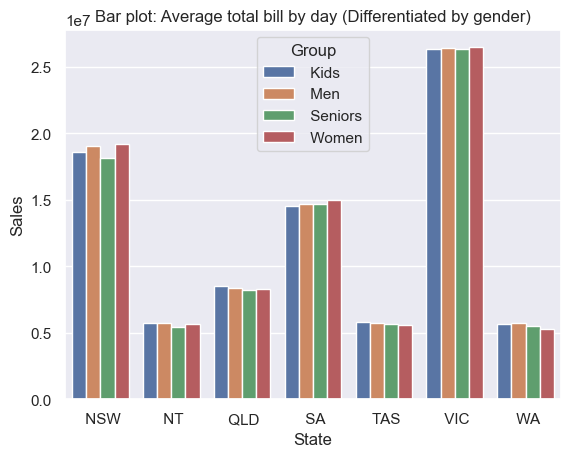

In [59]:
# creating new dataframe from the existing to deal with required data and generate specific info
df1=df.groupby(['State','Group'])['Sales'].sum().reset_index()

# 
sns.barplot(x='State', y='Sales', data=df1, hue='Group')
plt.title('Bar plot: Average total bill by day (Differentiated by gender)')
plt.show()

*Here Scale of the sales is higher. So scaling it down by 1million and plotting the graph again* 

In [63]:
#verifying the data by scaling it down
(df.groupby('State')['Sales'].sum()/1000000).reset_index()

,State,Sales
0,NSW,74.9700
1,NT,22.5800
2,QLD,33.4175
3,SA,58.8575
4,TAS,22.7600
5,VIC,105.5650
6,WA,22.1525


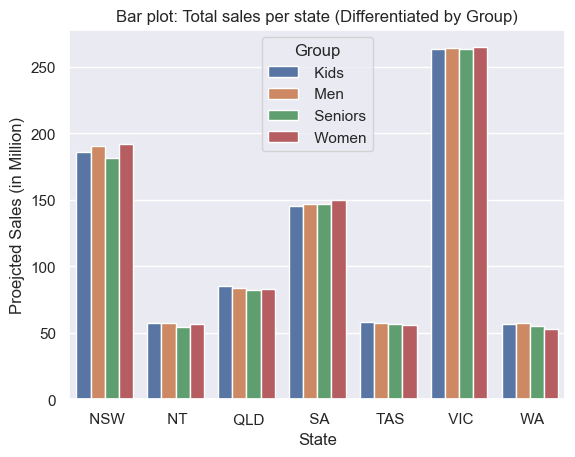

In [68]:
# creating new dataframe from the existing to deal with required data and generate specific info
df1=(df.groupby(['State','Group'])['Sales'].sum()/100000).reset_index()

# plotting the data
sns.barplot(x='State', y='Sales', data=df1, hue='Group')
plt.title('Bar plot: Total sales per state (Differentiated by Group)')
plt.ylabel('Proejcted Sales (in Million)')
plt.show()

*Note : Seaborn library is used here along with matplot lib, but sns.barplot is more user friendly to display or categorize the data for a specific category. Like here we are dispalying state wise sales which is catgorized on different groups by using the "hue"*

*Bar chart analysis*<br>
* *State VIC is generating the highest sales for all category*
* *States NT, TAS and WA is in generating some low sales for each group*
* *Seniors are not generating highest sales in any states but in some states they are generating minmum sales*

**Group-wise sales analysis (kids, women, men, and seniors) across different states.**

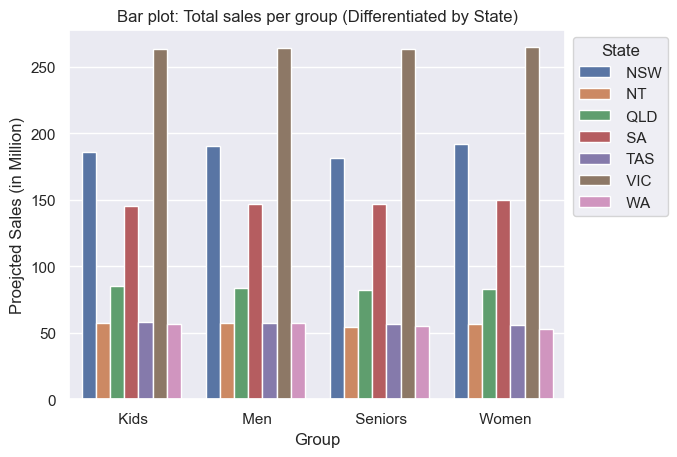

In [108]:
# creating new dataframe from the existing to deal with required data and generate specific info
df1=(df.groupby(['Group','State'])['Sales'].sum()/100000).reset_index()

# plotting the data
g=sns.barplot(x='Group', y='Sales', data=df1, hue='State')
sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1)) # moving legend outside of plot
# Put the legend out of the figure
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=1.)
#plt.legend(loc='upper left')
plt.title('Bar plot: Total sales per group (Differentiated by State)')
plt.ylabel('Proejcted Sales (in Million)')
#plt.figure(figsize=(40, 12))   #Figure size (width, height)
plt.show()

*Bar chart analysis*<br>

* *State VIC is generating the highest sales for all category*
* *States NT, TAS and WA is in generating some low sales for each group*
* *NSW is generating 2nd highest sales for every group*

**Time-of-the-day analysis**

*Bar plot helps us to identify minimum and maximum quite easily, So we will display time-of-the-day analysis using the barplot And as seaborn is quite user friendly as we do not need to set labels explicitely we will use seaborn package here too*

*In this case we will plot two barplot one on sum of sales and one on avg. sales to get a more clear idea*

*Time of day analysis on sum of sales*

In [125]:
# groupby Time and mean of sales
df.groupby(['Time'])['Sales'].mean()

Time
 Afternoon    45241.071429
 Evening      44479.166667
 Morning      45320.436508
Name: Sales, dtype: float64

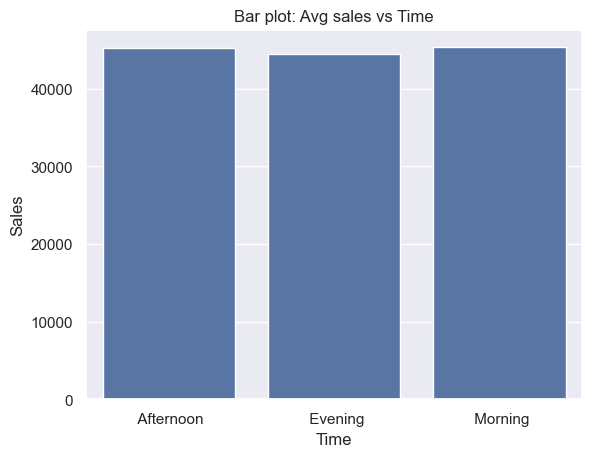

In [128]:
# creating new dataframe from the existing to deal with required data and generate specific info
df1=(df.groupby(['Time'])['Sales'].mean()).reset_index()

# plotting the data
sns.barplot(x='Time', y='Sales', data=df1)
plt.title('Bar plot: Avg sales vs Time')
#plt.ylabel('Proejcted Sales (in Million)')
#plt.figure(figsize=(40, 12))   #Figure size (width, height)
plt.show()

*Time of day analysis on mean of sales*

In [126]:
# groupby Time and sum of sales
df.groupby(['Time'])['Sales'].sum()/10000 # to scale it as mean divided the sum by 10000

Time
 Afternoon    11400.75
 Evening      11208.75
 Morning      11420.75
Name: Sales, dtype: float64

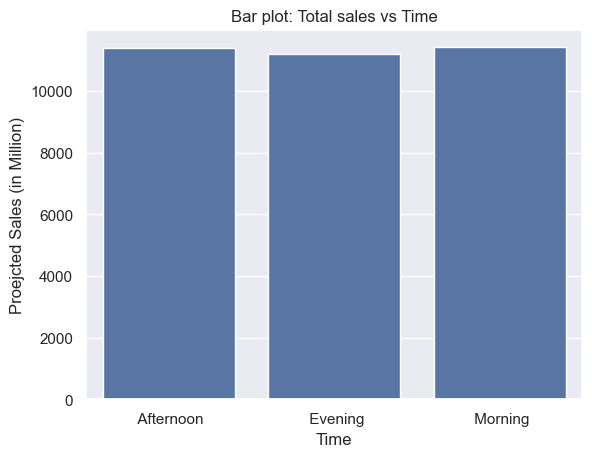

In [130]:
# creating new dataframe from the existing to deal with required data and generate specific info
df1=(df.groupby(['Time'])['Sales'].sum()/10000).reset_index()

# plotting the data
sns.barplot(x='Time', y='Sales', data=df1)
plt.title('Bar plot: Total sales vs Time')
plt.ylabel('Proejcted Sales (in Million)')
#plt.figure(figsize=(40, 12))   #Figure size (width, height)
plt.show()

*Chart Analysis*<br>
* *In both of the bar chart it is clear that sales are minimum in evening time*
* *Sales are bit higher in morning but almost near to the sales in afternoon*

**Daily, weekly, monthly and quarterly charts**

*Daily reports are already generated in above section as we are not grouping the days as weekdays or months*

*Weekly reports of different states on sales*

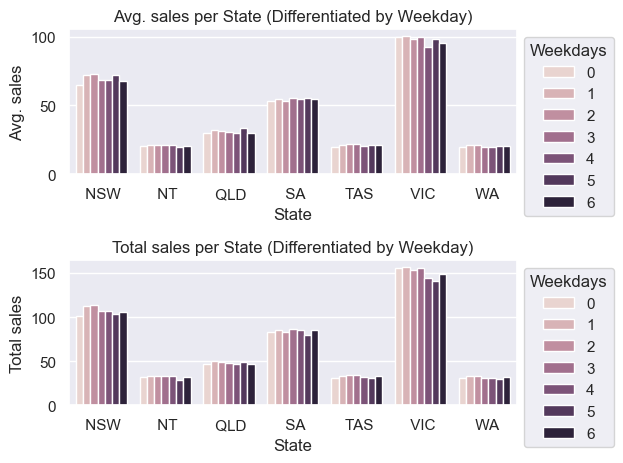

In [150]:
# weekly reports of different states on sales

df1=(df.groupby(['State','Weekdays'])['Sales'].mean()/1000).reset_index()
df2=(df.groupby(['State','Weekdays'])['Sales'].sum()/100000).reset_index()

#creating subplots
f, axes = plt.subplots(2, 1) # 2 is the no. of rwos and 1 here is the no. of col in the subplot 

# plotting the data on subplot 1 i.e axes[0]
g=sns.barplot(x='State', y='Sales', data=df1, hue='Weekdays', ax=axes[0])
axes[0].set_title('Avg. sales per State (Differentiated by Weekday)')
axes[0].set_ylabel('Avg. sales')
sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1)) # moving legend outside of plot

# plotting the data on subplot 2 i.e axes[1]
h=sns.barplot(x='State', y='Sales', data=df2, hue='Weekdays', ax=axes[1])
axes[1].set_title('Total sales per State (Differentiated by Weekday)')
axes[1].set_ylabel('Total sales')
sns.move_legend(h, "upper left", bbox_to_anchor=(1, 1)) # moving legend outside of plot

plt.tight_layout() # to remove the overlapping between title of subplot 2 with xlables of subplot1
plt.show()

*Bar plot analysis*
* *Bar plot is displaying that any of the 1th 2th and 3th days of the week is generating max sales*<br>
* *Above bar plot is also indicating that in most of the states except QLD, sales is low on 5th day of the week*

*Weekly reports of different Groups generating sales*

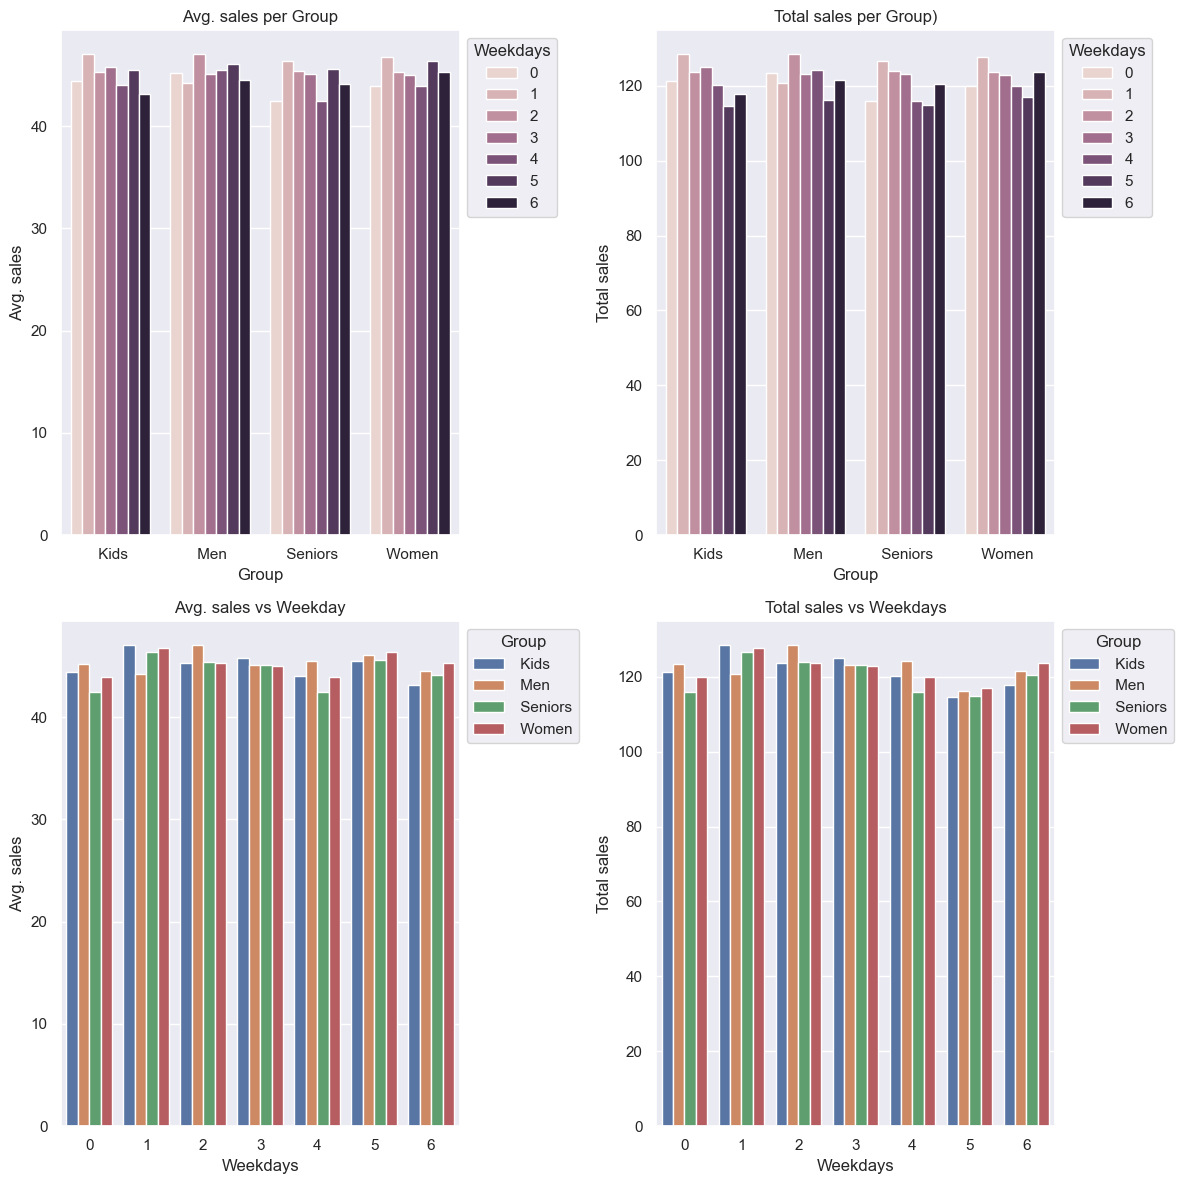

In [175]:
# weekly reports of different Groups generating sales

df1=(df.groupby(['Group','Weekdays'])['Sales'].mean()/1000).reset_index()
df2=(df.groupby(['Group','Weekdays'])['Sales'].sum()/100000).reset_index()
df3=(df.groupby(['Weekdays','Group'])['Sales'].mean()/1000).reset_index()
df4=(df.groupby(['Weekdays','Group'])['Sales'].sum()/100000).reset_index()

#creating subplots
f, axes = plt.subplots(2, 2, figsize=(12,12)) # 2 is the no. of rwos and 1 here is the no. of col in the subplot 

# plotting the data on subplot 1 i.e axes[0]
g=sns.barplot(x='Group', y='Sales', data=df1, hue='Weekdays', ax=axes[0][0])
axes[0][0].set_title('Avg. sales per Group')
axes[0][0].set_ylabel('Avg. sales')
#axes[0][0].xticks(rotation = 30)   #Rotating the x axis labels
sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1)) # moving legend outside of plot

# plotting the data on subplot 2 i.e axes[1]
h=sns.barplot(x='Group', y='Sales', data=df2, hue='Weekdays', ax=axes[0][1])
axes[0][1].set_title('Total sales per Group)')
axes[0][1].set_ylabel('Total sales')
sns.move_legend(h, "upper left", bbox_to_anchor=(1, 1)) # moving legend outside of plot

# plotting the data on subplot 3 i.e axes[0]
g1=sns.barplot(x='Weekdays', y='Sales', data=df3, hue='Group', ax=axes[1][0])
axes[1][0].set_title('Avg. sales vs Weekday')
axes[1][0].set_ylabel('Avg. sales')
sns.move_legend(g1, "upper left", bbox_to_anchor=(1, 1)) # moving legend outside of plot

# plotting the data on subplot 4 i.e axes[1]
h1=sns.barplot(x='Weekdays', y='Sales', data=df4, hue='Group', ax=axes[1][1])
axes[1][1].set_title('Total sales vs Weekdays')
axes[1][1].set_ylabel('Total sales')
sns.move_legend(h1, "upper left", bbox_to_anchor=(1, 1)) # moving legend outside of plot

plt.tight_layout() # to remove the overlapping between title of subplot 2 with xlables of subplot1
plt.show()

*Plot analysis*
* *Sales are higher on 1th day of weekdays for kids*
* *Sales are higher on 2th day of weekdays for Mens*
* *Sales are higher on 1th day of weekdays for seniors*
* *Sales are higher on 1th day of weekdays for Womans*
* *avg Sales are higher on 1th and 5th day of weekdays for woman*

*We could conclude that in 1th day of week kids and seniors may be accompanied by woman thus sales are higher for kids,woman and Seniors*

*Weekly reports of generating sales on different times*

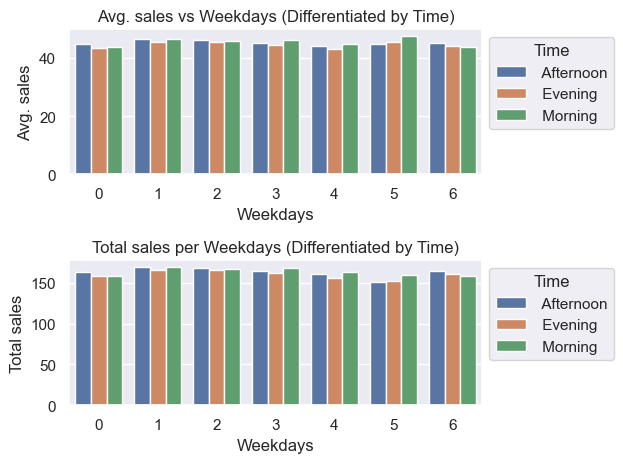

In [177]:
# weekly reports of generating sales on different times
df1=(df.groupby(['Time','Weekdays'])['Sales'].mean()/1000).reset_index()
df2=(df.groupby(['Time','Weekdays'])['Sales'].sum()/100000).reset_index()


#creating subplots
f, axes = plt.subplots(2, 1) # 2 is the no. of rwos and 1 here is the no. of col in the subplot 

# plotting the data on subplot 1 i.e axes[0]
g=sns.barplot(x='Weekdays', y='Sales', data=df1, hue='Time', ax=axes[0])
axes[0].set_title('Avg. sales vs Weekdays (Differentiated by Time)')
axes[0].set_ylabel('Avg. sales')
sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1)) # moving legend outside of plot

# plotting the data on subplot 2 i.e axes[1]
h=sns.barplot(x='Weekdays', y='Sales', data=df2, hue='Time', ax=axes[1])
axes[1].set_title('Total sales per Weekdays (Differentiated by Time)')
axes[1].set_ylabel('Total sales')
sns.move_legend(h, "upper left", bbox_to_anchor=(1, 1)) # moving legend outside of plot

plt.tight_layout() # to remove the overlapping between title of subplot 2 with xlables of subplot1
plt.show()

*Bar plot analysis*
* *most preferred time for sales are Morning and in Afternoon*
* *Sales are lower in Evening*

*Monthly reports on different sate vs sales*

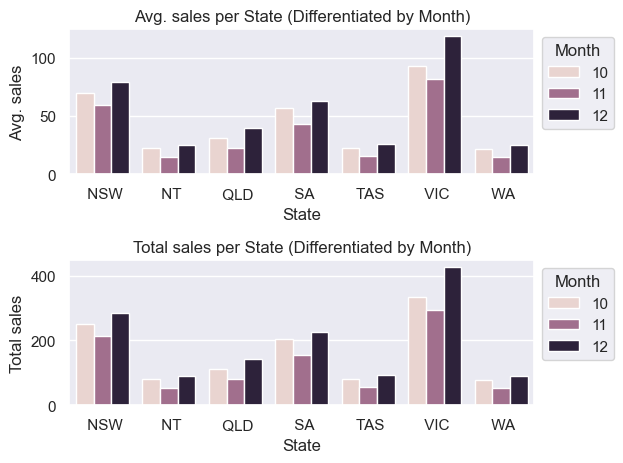

In [182]:
# monthly reports of different states on sales

df1=(df.groupby(['State','Month'])['Sales'].mean()/1000).reset_index()
df2=(df.groupby(['State','Month'])['Sales'].sum()/100000).reset_index()

#creating subplots
f, axes = plt.subplots(2, 1) # 2 is the no. of rwos and 1 here is the no. of col in the subplot 

# plotting the data on subplot 1 i.e axes[0]
g=sns.barplot(x='State', y='Sales', data=df1, hue='Month', ax=axes[0])
axes[0].set_title('Avg. sales per State (Differentiated by Month)')
axes[0].set_ylabel('Avg. sales')
sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1)) # moving legend outside of plot

# plotting the data on subplot 2 i.e axes[1]
h=sns.barplot(x='State', y='Sales', data=df2, hue='Month', ax=axes[1])
axes[1].set_title('Total sales per State (Differentiated by Month)')
axes[1].set_ylabel('Total sales')
sns.move_legend(h, "upper left", bbox_to_anchor=(1, 1)) # moving legend outside of plot

plt.tight_layout() # to remove the overlapping between title of subplot 2 with xlables of subplot1
plt.show()

*Bar plot analysis*
* *12th month is generating the higest sales on each state*
* *11th month is generating the lowest sales on each state*

*Monthly reports of different Groups generating sales*

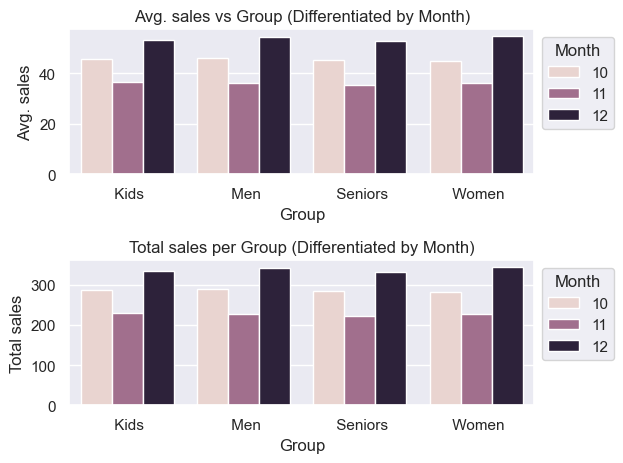

In [183]:
# monthly reports of generating sales on different times
df1=(df.groupby(['Group','Month'])['Sales'].mean()/1000).reset_index()
df2=(df.groupby(['Group','Month'])['Sales'].sum()/100000).reset_index()


#creating subplots
f, axes = plt.subplots(2, 1) # 2 is the no. of rwos and 1 here is the no. of col in the subplot 

# plotting the data on subplot 1 i.e axes[0]
g=sns.barplot(x='Group', y='Sales', data=df1, hue='Month', ax=axes[0])
axes[0].set_title('Avg. sales vs Group (Differentiated by Month)')
axes[0].set_ylabel('Avg. sales')
sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1)) # moving legend outside of plot

# plotting the data on subplot 2 i.e axes[1]
h=sns.barplot(x='Group', y='Sales', data=df2, hue='Month', ax=axes[1])
axes[1].set_title('Total sales per Group (Differentiated by Month)')
axes[1].set_ylabel('Total sales')
sns.move_legend(h, "upper left", bbox_to_anchor=(1, 1)) # moving legend outside of plot

plt.tight_layout() # to remove the overlapping between title of subplot 2 with xlables of subplot1
plt.show()

*Bar plot analysis*
* *12th month is generating the higest sales by each group*
* *11th month is generating the lowest sales by each group*

*Monthly reports of generating sales on different times*

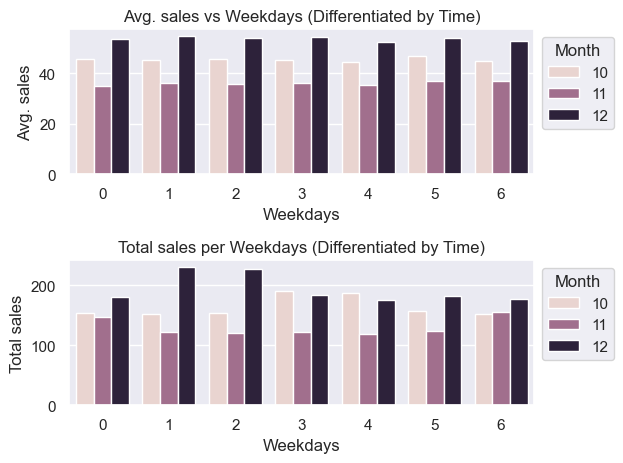

In [184]:
# Monthly reports of generating sales on different times
df1=(df.groupby(['Month','Weekdays'])['Sales'].mean()/1000).reset_index()
df2=(df.groupby(['Month','Weekdays'])['Sales'].sum()/100000).reset_index()


#creating subplots
f, axes = plt.subplots(2, 1) # 2 is the no. of rwos and 1 here is the no. of col in the subplot 

# plotting the data on subplot 1 i.e axes[0]
g=sns.barplot(x='Weekdays', y='Sales', data=df1, hue='Month', ax=axes[0])
axes[0].set_title('Avg. sales vs Weekdays (Differentiated by Time)')
axes[0].set_ylabel('Avg. sales')
sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1)) # moving legend outside of plot

# plotting the data on subplot 2 i.e axes[1]
h=sns.barplot(x='Weekdays', y='Sales', data=df2, hue='Month', ax=axes[1])
axes[1].set_title('Total sales per Weekdays (Differentiated by Time)')
axes[1].set_ylabel('Total sales')
sns.move_legend(h, "upper left", bbox_to_anchor=(1, 1)) # moving legend outside of plot

plt.tight_layout() # to remove the overlapping between title of subplot 2 with xlables of subplot1
plt.show()

*Bar plot analysis*
* *Everyday in 12th month is generating highest sales*
* *1th and 2th day of every week of every month is generating highest sales*